In [103]:
import sys
sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py3-envs/DESCQA/lib/python3.6/site-packages')
import subprocess
assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

In [104]:
import GCRCatalogs
## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)
## list all find available catlaogs, sorted by their name
print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

GCRCatalogs = 0.6.8 | GCR = 0.6.1
buzzard
buzzard_high-res
buzzard_test
dc1
protoDC2


In [105]:
## load 'protoDC2' catalog
gc = GCRCatalogs.load_catalog('protoDC2')
gc.get_quantities(['mag_u_lsst', 'ra', 'dec'])

{'dec': array([-2.49390244, -2.4465878 , -2.47334218, ..., -1.57574439,
        -1.57624245, -1.56156218], dtype=float32),
 'mag_u_lsst': array([ 22.85408396,  20.89889978,  21.49888417, ...,  25.59293414,
         23.05899988,  25.42904369]),
 'ra': array([ 2.04596066, -1.91125453,  0.76751482, ...,  1.62644827,
         1.60419965,  1.60762465], dtype=float32)}

In [110]:
print(', '.join(gc.list_all_quantities()))

shear_2, Mag_true_u_sdss_z0, mag_z_lsst, ellipticity_1, mag_z_sdss, mag_g_sdss, Mag_true_r_sdss_z0, bulge_sersic_index, velocity_y, mag_u_lsst, redshift_true, mag_r_sdss, halo_mass, stellar_mass, position_z, mag_u_sdss, size_disk_true, galaxy_id, dec, position_y, redshift, ellipticity_2, mag_i_lsst, velocity_x, is_central, mag_i_sdss, magnification, Mag_true_r_lsst_z0, disk_sersic_index, Mag_true_z_lsst_z0, ra, dec_true, mag_r_lsst, size_bulge_true, Mag_true_z_sdss_z0, halo_id, shear_1, Mag_true_i_lsst_z0, Mag_true_i_sdss_z0, mag_Y_lsst, ra_true, Mag_true_g_sdss_z0, Mag_true_u_lsst_z0, mag_g_lsst, Mag_true_Y_lsst_z0, Mag_true_g_lsst_z0, convergence, position_x, velocity_z


In [ ]:
gc.get_quantities('redshift')

In [81]:
print("There are %i halos" %(len(set(gc.get_quantities('halo_id')['halo_id']))))
print("and %i galaxies in the catalog." %(len(gc.get_quantities('galaxy_id')['galaxy_id'])))
print("The halo mass:")
print(min(gc.get_quantities('halo_mass')['halo_mass']),max(gc.get_quantities('halo_mass')['halo_mass']))

There are 4093249 halos
and 10022496 galaxies in the catalog.
The halo mass:
1.47215e+10 5.95589e+14


In [106]:
import pandas as pd
data = gc.get_quantities(['halo_id', 'ra','dec','ra_true','dec_true','is_central',
                          'halo_mass','stellar_mass','redshift_true'])
df = pd.DataFrame(data,columns=['halo_id','halo_mass','ra','dec','ra_true','dec_true','is_central',
                                'stellar_mass','redshift_true'])

#Select only central galaxy
df = df.loc[df['is_central'] == True]

#Select the most massive halo
df = df.loc[df['halo_mass'] == max(df['halo_mass'])]

#Select the whole sky area around the most massive halo
#df = df.loc[(df['ra']>1.048464)&(df['ra']<1.248992)&(df['dec']>2.115725)&(df['dec']<2.389798)]

df.sort_values(by=['redshift_true'], ascending=True)
#sum(df['stellar_mass'])

,halo_id,halo_mass,ra,dec,ra_true,dec_true,is_central,stellar_mass,redshift_true
2245406,1643813971364438029,5.955888e+14,1.154188,2.203995,1.153542,2.20316,True,1.976130e+12,0.358451


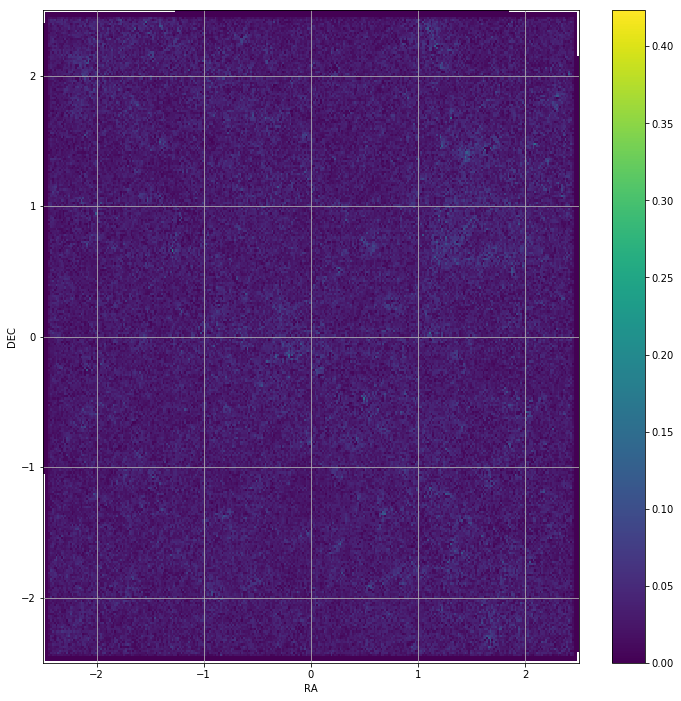

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
plt.rcParams["figure.figsize"] = [12,12]

data2 = gc.get_quantities(['shear_1', 'shear_2', 
                          'convergence','halo_mass','ra','dec'])
df2 = pd.DataFrame(data2,columns=['shear_1','shear_2',
                                'convergence','halo_mass','ra','dec'])
# select the most massive halo
#df2 = df2.loc[df2['halo_mass'] == max(df2['halo_mass'])]

# select the WHOLE area of the most massive halo
#df2 = df2.loc[(df2['ra']>1.048464)&(df2['ra']<1.248992)&(df2['dec']>2.115725)&(df2['dec']<2.389798)]

# select the central area
#df2 = df2.loc[(df2['ra']>-0.11)&(df2['ra']<0.11)&(df2['dec']>-0.11)&(df2['dec']<0.11)]

# data
x, y, rho = df2['ra'], df2['dec'], df2['convergence']

# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 300), np.linspace(y.min(), y.max(), 300)
xi, yi = np.meshgrid(xi, yi)

# Interpolate; there's also method='cubic' for 2-D data such as here
zi = scipy.interpolate.griddata((x, y), rho, (xi, yi), method='linear')

plt.imshow(zi, vmin=rho.min(), vmax=rho.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.plot(1.154188,2.203995,'r+')
plt.grid(True)
plt.colorbar()
plt.show()